In [4]:
import pandas
import matplotlib.pyplot as plt


c:\users\r\appdata\local\programs\python\python37-32\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


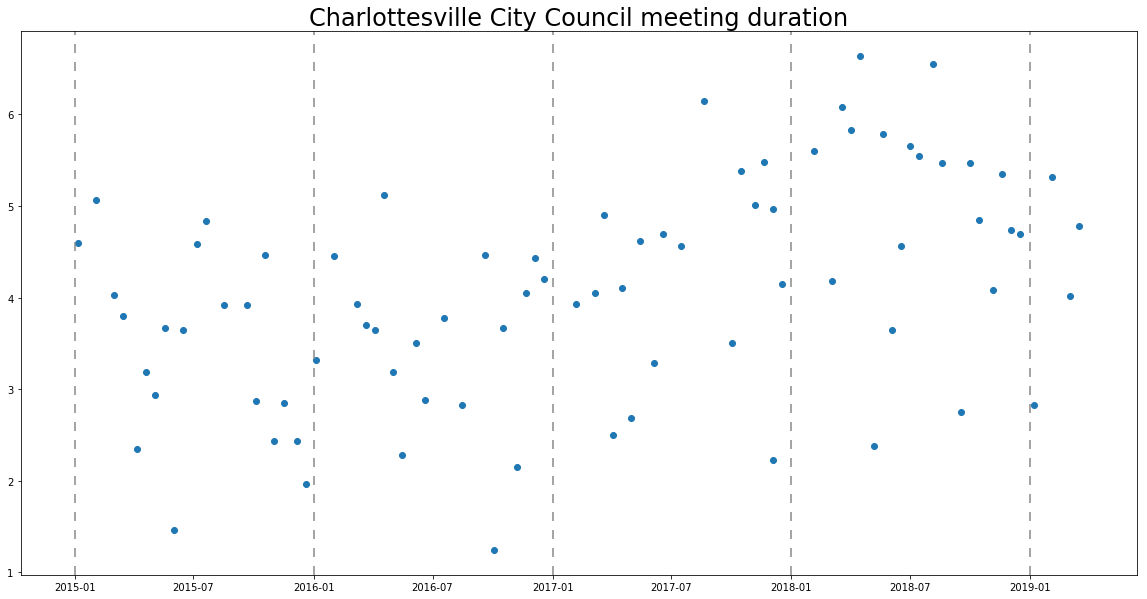

20
39
57
77
81


In [5]:
df = pandas.read_json("./meetings/City_Council_meetings - cleaned 2019-03-21.json")
df_cc = df[df.meeting_body == "City Council"]
df_cc = df_cc[df_cc.date > "1/1/15"]
df_cc = df_cc[(df_cc.date.dt.dayofweek == 0)]
#df_cc = df_cc[df_cc.date.dt.day == 0]
plt.figure(figsize=(20,10))
plt.scatter(df_cc['date'], df_cc['duration_hours'])
plt.axvline(x="1/1/15", dashes=[6, 6], color="#888888")
plt.axvline(x="1/1/16", dashes=[6, 6], color="#888888")
plt.axvline(x="1/1/17", dashes=[6, 6], color="#888888")
plt.axvline(x="1/1/18", dashes=[6, 6], color="#888888")
plt.axvline(x="1/1/19", dashes=[6, 6], color="#888888")
plt.title('Charlottesville City Council meeting duration', fontsize=24)
plt.show()
#df.to_csv("./meetings.csv")
df_cc.to_html('temp.html')
print(df_cc[df_cc.date < "1/1/16"].shape[0])
print(df_cc[df_cc.date < "1/1/17"].shape[0])
print(df_cc[df_cc.date < "1/1/18"].shape[0])
print(df_cc[df_cc.date < "1/1/19"].shape[0])
print(df_cc[df_cc.date < "1/1/20"].shape[0])

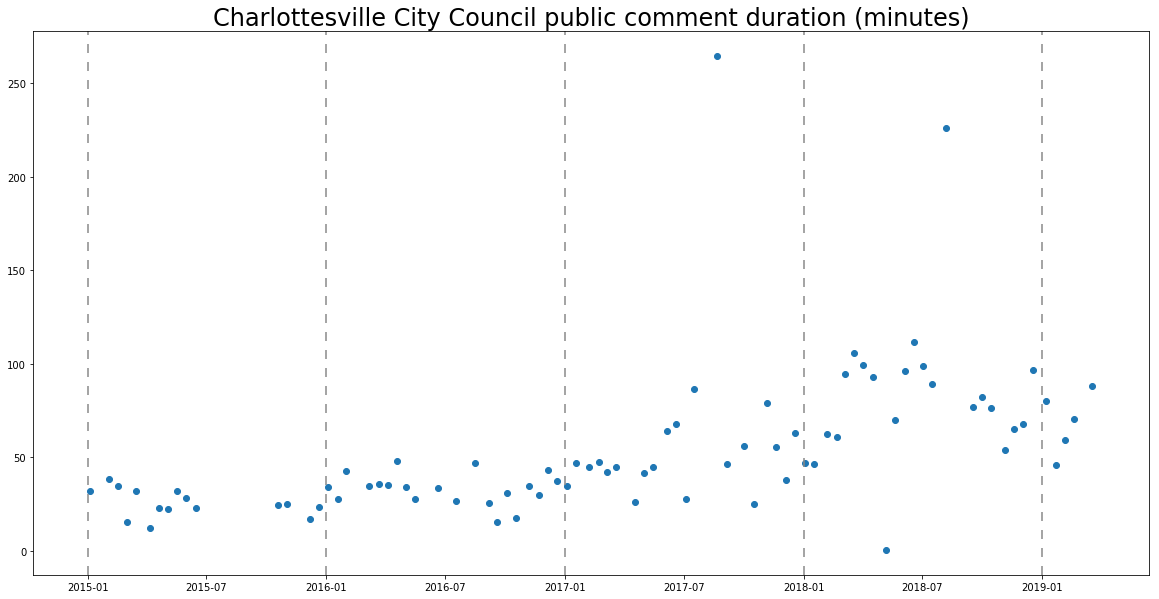

    comment_duration       date
0          88.266667 2019-03-18
1          70.500000 2019-02-19
2          59.316667 2019-02-04
3          45.950000 2019-01-22
4          80.150000 2019-01-07
5          96.666667 2018-12-17
6          67.916667 2018-12-03
7          65.400000 2018-11-19
8          53.766667 2018-11-05
9          76.333333 2018-10-15
10         82.300000 2018-10-01
11         76.916667 2018-09-17
12        226.166667 2018-08-06
13         89.300000 2018-07-16
14         98.816667 2018-07-02
15        111.383333 2018-06-18
16         96.000000 2018-06-04
17         69.916667 2018-05-21
18          0.500000 2018-05-07
19         93.100000 2018-04-16
20         99.233333 2018-04-02
21        105.883333 2018-03-19
22         94.483333 2018-03-05
23         60.850000 2018-02-20
24         62.583333 2018-02-05
25         46.250000 2018-01-16
26         47.250000 2018-01-02
27         62.883333 2017-12-18
28         38.116667 2017-12-04
29         55.400000 2017-11-20
30      

In [6]:
df = pandas.read_json("./meetings/City_Council_meetings.json")
df_cc = df[df.meeting_body == "City Council"]
df_cc = df_cc[df_cc.date > "1/1/15"]
df_cc = df_cc[df_cc.agenda.notnull()]
#df_cc = df_cc[(df_cc.date.dt.dayofweek == 0)]
#print(df_cc)
comments = []
for index, row in df_cc.iterrows():
    #print(row['agenda'])
    #print(type(row['agenda']))
    comment = [x for x in row['agenda'] if x['item_name'] in ["COMMUNITY MATTERS", "MATTERS BY THE PUBLIC"]]
    #print(comment)
    #print(type(comment))
    if(len(comment) > 0 and 'duration' in comment[0]):
        comments.append({
            "date": row['date'],
            "comment_duration": comment[0]['duration']/60,
        })
    #print(comment)
    #print(row['date'], row['agenda'][row['agenda'].item_name.notnull()])

df_public = pandas.DataFrame(comments)
plt.figure(figsize=(20,10))
plt.scatter(df_public['date'], df_public['comment_duration'])
plt.axvline(x="1/1/15", dashes=[6, 6], color="#888888")
plt.axvline(x="1/1/16", dashes=[6, 6], color="#888888")
plt.axvline(x="1/1/17", dashes=[6, 6], color="#888888")
plt.axvline(x="1/1/18", dashes=[6, 6], color="#888888")
plt.axvline(x="1/1/19", dashes=[6, 6], color="#888888")
plt.title('Charlottesville City Council public comment duration (minutes)', fontsize=24)
plt.show()
with pandas.option_context('display.max_rows', None):
    print(df_public)
#print(df_public)

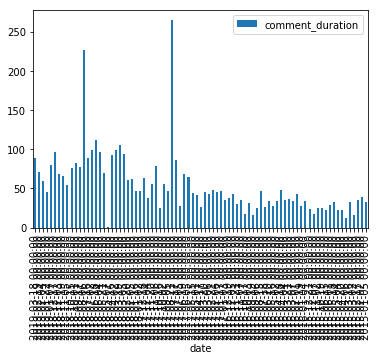

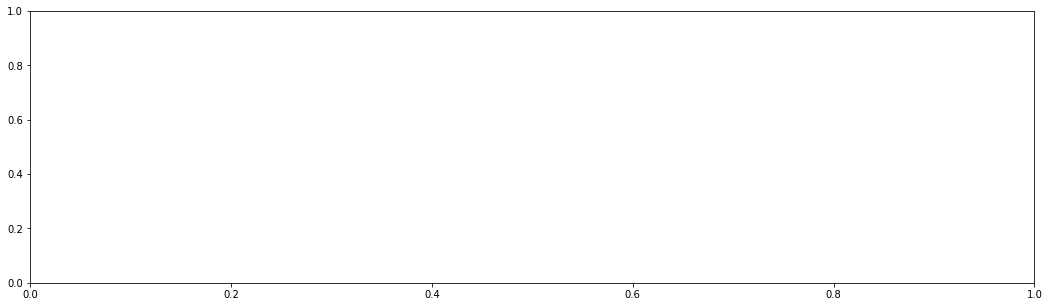

In [13]:
df_public.plot.bar(x='date', y='comment_duration')
plt.subplots(figsize=(18,5))
plt.show()
#plt.bar(df_public['date'], df_public['comment_duration'])